# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Regressão Linear e Descida do Gradiente em Python

### Definição do Problema

Uma fábrica de alimentos possui diversas máquinas que ficam em operação um determinado número de horas por semana. Cada máquina recebe manutenção preventiva a cada intervalo de tempo determinado em dias. O dataset anexo mostra esta relação entre horas de operação por semana e dias de intervalo entre as manutencões preventivas nos 3 últimos anos.

Vamos criar um modelo que seja capaz de prever o intervalo de manutenção necessário dado o número de horas de operação por semana!

## Regressão linear

**A Regressão Linear** nos ajuda a descobrir relações lineares em um conjunto de dados, ou seja, descobre uma linha que melhor se adapta aos dados. 

A equação padrão para uma linha em um Plano Cartesiano XY é dada por $ y = a + bx $ onde **o coeficiente b** é a inclinação da linha (Slope) e **o coeficente a** é a interceptação no eixo y (intercept).

Para encontrar a melhor linha que se ajusta aos nossos dados, precisamos **otimizar** os valores de a e b e para isso usaremos o algorimo de descida do gradiente.

## Descida do Gradiente

**Gradient Descent** é um algoritmo que ajuda a minimizar uma função, ou seja, encontra o valor mínimo de uma função, o valor em mínimos locais.

No início, o algoritmo de descida do gradiente recebe um conjunto inicial de parâmetros para uma função específica definida por alguns parâmetros definidos. Em seguida, **iterativamente** avança em direção a um conjunto de valores de parâmetros que minimizam a função. **A minimização iterativa** é obtida usando o cálculo, realizando etapas na direção **negativa** do gradiente da função.

## Carregando os Dados

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Função para ler e carregar os dados
def carrega_dados():
    data_file = open("data/dataset1.txt", "r")
    raw_data = data_file.readlines()
    data_file.close()
    return [line.strip().split("  ") for line in raw_data]

In [3]:
# Armazena os dados
dataset = carrega_dados()
print("Número de Linhas no Dataset: {}".format(len(dataset)))

Número de Linhas no Dataset: 1000


In [4]:
# Imprime os dados
print(dataset)

[['21.20', '152.00'], ['27.80', '190.10'], ['25.60', '175.28'], ['25.20', '177.46'], ['23.04', '176.46'], ['24.81', '165.74'], ['24.26', '170.76'], ['23.94', '171.38'], ['25.63', '180.09'], ['24.21', '173.05'], ['23.88', '166.27'], ['25.17', '175.72'], ['23.90', '174.13'], ['24.92', '169.67'], ['24.64', '170.12'], ['24.81', '176.43'], ['24.61', '173.32'], ['25.96', '178.64'], ['24.87', '173.58'], ['21.57', '164.06'], ['25.84', '174.90'], ['25.77', '184.99'], ['24.05', '173.02'], ['26.02', '179.73'], ['24.03', '170.90'], ['24.15', '177.31'], ['27.30', '175.39'], ['23.90', '170.48'], ['23.80', '173.02'], ['25.60', '176.33'], ['24.71', '175.15'], ['23.80', '175.03'], ['23.38', '172.66'], ['24.02', '177.24'], ['24.48', '172.96'], ['25.32', '175.91'], ['24.37', '176.33'], ['25.07', '181.89'], ['23.76', '172.61'], ['25.93', '177.84'], ['24.22', '174.74'], ['23.45', '166.55'], ['24.79', '172.80'], ['24.15', '176.01'], ['24.14', '171.22'], ['26.94', '184.00'], ['24.51', '172.75'], ['23.98', '1

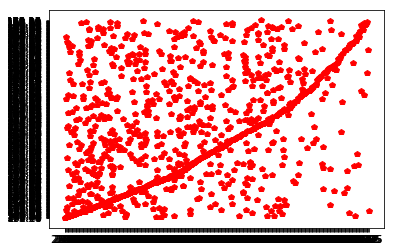

In [5]:
# Plot
plot([x[0] for x in dataset],[x[1] for x in dataset], 'ro', color = 'red', marker = 'p')

### Função de Erro

A maneira padrão de encontrar a melhor linha é definir uma função de erro que calcula o erro para um dado valor de a & b para todos os pontos de dados. Desta forma, a função de erro mede quão boa é uma linha para um conjunto de a & b. Uma função de erro popular é a função de erro quadrático que é definida como:

$$ E = \frac{1}{N}\sum_{i=0}^N(t_i - (a + bx_i) )^2 $$

A distância do erro é **ao quadrado** para garantir que o erro permaneça positivo para todo valor de x e a função de erro seja diferenciável. As linhas melhor ajustadas resultam em valores mais baixos da função de erro.

In [9]:
def func_error(a,b):
    totalError = 0
    for item in dataset:
        x = float(item[0])
        y = float(item[1])
        totalError += (y - (a + b*x))**2
    return totalError/float(len(dataset))

Partindo de algum lugar qualquer, o algoritmo de descida do gradiente move-se para baixo para procurar o valor ideal de a & b. Em cada iteração, **atualizará** os valores a & b para uma linha que forneça taxas de erro menores.

### Definindo a Descida do Gradiente

Para executar a descida do gradiente na função de erro, primeiro precisamos calcular o gradiente. Como a função de erro $ E (a, b) $ é uma função de duas variáveis, os gradientes correspondentes são:

$$ \frac{\partial E}{\partial b} = \frac{2}{N}(t_i - bx_i - a)(-x) \ \ ,\ \frac{\partial E}{\partial a} = \frac{2}{N}(t_i - bx_i - a)(-1)$$

O algoritmo de descida do gradiente usa valores dessas duas funções para calcular o valor da etapa e a direção a ser movida.

A descida do gradiente é um algoritmo de otimização iterativa de primeira ordem para encontrar o mínimo de uma função. Para encontrar um mínimo local de uma função usando gradiente descendente, toma-se medidas proporcionais ao negativo do gradiente (ou do gradiente aproximado) da função no ponto atual. Se, em vez disso, a pessoa adotar medidas proporcionais ao positivo do gradiente, será abordado um máximo local dessa função; o procedimento é então conhecido como subida do gradiente.

A descida do gradiente é um método popular no campo do aprendizado de máquina porque parte do processo de aprendizado de máquina é minimizar a taxa de erro, a partir de um conjunto de dados de treinamento. A descida do gradiente é usada para encontrar o erro mínimo, minimizando uma função de "custo".

A descida do gradiente é baseada na observação de que, se a função multi-variável ${ F(\mathbf {x} )}$ é definida e diferenciável em uma vizinhança de um ponto $ \mathbf {a} $, então $F(\mathbf {x} ) $ diminui mais rapidamente se um valor vai de $\mathbf {a} $ na direção do gradiente negativo de ${\displaystyle F}$ em $\mathbf {a} ,$ $$ -\nabla F(\mathbf {a} ) $$Com isso, se

$${\displaystyle \mathbf {a^{n+1}} =\mathbf {a^{n}} -\gamma \nabla F(\mathbf {a^{n}} )}$$

para ${\displaystyle \gamma }$ pequeno suficiente, então ${\displaystyle F(\mathbf {a^{n}} )\geq F(\mathbf {a^{n+1}} )}$. Em outras palavras, o termo ${\displaystyle \gamma \nabla F(\mathbf {a} )}$ é subtraído de ${\displaystyle \mathbf {a} }$ pois queremos mover **contra** o gradiente, ou seja, para baixo, para o mínimo. Com esta observação em mente, começa-se com um palpite ${\displaystyle \mathbf {x} _{0}} $ para o mínimo local de ${\displaystyle F}$ , e considera-se a sequência ${\displaystyle \mathbf {x} _{0},\mathbf {x} _{1},\mathbf {x} _{2},\dots}$ tal como

$${\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\gamma _{n}\nabla F(\mathbf {x} _{n}),\ n\geq 0.}$$

$$F(\mathbf {x} _{0})\geq F(\mathbf {x} _{1})\geq F(\mathbf {x} _{2})\geq \cdots $$

por isso espera-se que a sequência ${\displaystyle (\mathbf {x} _{n})} $ convirja para o mínimo local desejado.

### Função Para o Passo do Gradiente

In [6]:
def step_gradient(current_a, current_b):
    de_da = 0
    de_db = 0
    N = float(len(dataset))
    
    for point in dataset:
        x = float(point[0])
        t = float(point[1])
        
        de_db += (-2/N)*(t - current_b * x + current_a)*(x)
        de_da += (-2/N)*(t - current_b * x + current_a)
        
    new_a = current_a - de_da * learning_rate
    new_b = current_b - de_db * learning_rate
    
    return [new_a, new_b]

### Taxa de Aprendizado

A variável Taxa de Aprendizagem determina o tamanho do passo que devemos dar em descida durante cada iteração. Um longo passo pode ultrapassar o mínimo e uma taxa muito pequena levará mais tempo para terminar.

In [17]:
# Taxa de aprendizado
learning_rate = 0.0001

# Iterações
iterations = 500

# Variáveis para o Plot
errors = []
a_values = []
b_values = []

### Função Para Descida do Gradiente

In [18]:
def gradient_descent(i_a, i_b):
    a = i_a
    b = i_b
    
    for i in range(iterations):
        a, b = step_gradient(a, b)
        errors.append(func_error(a, b))
        a_values.append(a)
        b_values.append(b)
    return [a, b]

### Função Para o Treinamento

In [19]:
def treinamento():
    initial_a = 0
    initial_b = 0
    
    print("Valor inicial de a: {} \nValor inicial de b: {}".format(initial_a, initial_b))
    
    print("\nErro inicial: {}".format(func_error(initial_a, initial_b)))
    
    # Treinamento
    [a,b] = gradient_descent(initial_a, initial_b)
    
    print("\nApós {} iterações, valor final de a: {}, valor final de b: {}".format(iterations, a, b))
    
    print("\nErro Final: {}".format(func_error(a, b)))
    
    return [a,b]

### Executa o Treinamento

In [20]:
[a,b] = treinamento()

Valor inicial de a: 0 
Valor inicial de b: 0

Erro inicial: 30179.035455

Após 500 iterações, valor final de a: 0.30688958271971634, valor final de b: 7.055715527084805

Erro Final: 37.67549577296781


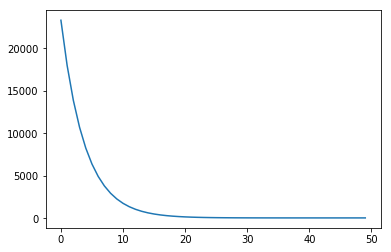

In [21]:
# Plot Erros x Iterações
plot(errors[:50])

In [22]:
# Função para fazer previsões
def preve_manut(horas):
    """
    Input: Horas de operação por semana
    Output: Dias para manutenação preventiva
    """
    return round((a + b * horas), 2)

In [23]:
# Previsão
print("Número de dias para a próxima manutenção preventiva:", preve_manut(28))

Número de dias para a próxima manutenção preventiva: 197.87


In [24]:
# Previsão
print("Número de dias para a próxima manutenção preventiva:", preve_manut(22))

Número de dias para a próxima manutenção preventiva: 155.53


# Fim